In [1]:
import nltk

In [2]:
#nltk.download()
#downloads corpus
#downloads stop words
#downloads pre-defined datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
reviews=pd.read_csv('C:/Users/Srishti/Desktop/Data Science/Unstructured Data/Text Analytics/K8 Reviews v0.2.csv')
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [5]:
reviews.shape

(14675, 2)

#### Insights:
    If the rating given by the customer is 1,2,3 => sentiment is 0
    If the rating given by the customer is 4 and 5 => sentiment is 1

In [6]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

Plot the word cloud and the bar graph of the reviews

In [7]:
#!pip install wordcloud

In [8]:
from wordcloud import WordCloud

In [9]:
reviews_combined=" ".join(reviews.review.values)

In [10]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [11]:
word_cloud=WordCloud().generate(reviews_combined)

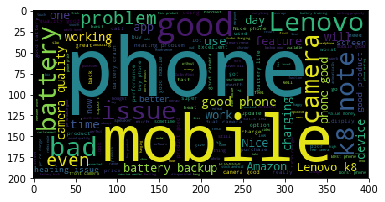

In [12]:
#wordcloud without using the axis and tigh_layout function:
plt.imshow(word_cloud)
plt.show()

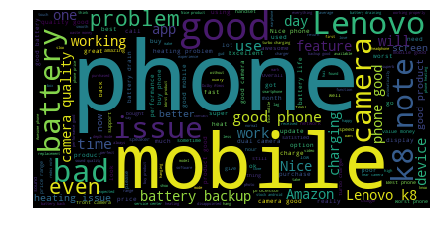

In [13]:
#wordcloud using the axis and tigh_layout function also:
plt.imshow(word_cloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [14]:
word_cloud1=WordCloud(width=800,height=800,background_color='white',
                     max_words=150).generate_from_text(reviews_combined)

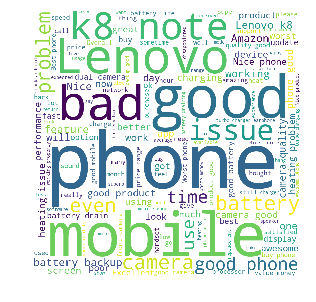

In [15]:
plt.imshow(word_cloud1)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#### Top 25 words:

In [16]:
dictionary={}
list1=[]
for i in reviews_combined.split():
    list1.append(i)
for i in list1:
    dictionary[i]=dictionary.get(i,0)+1
series=pd.Series(dictionary)
dataframe=pd.DataFrame(series).reset_index()
new_dataframe=dataframe.rename(columns={'index':'Words',0:'Count'})
new_dataframe.head()

,Words,Count
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [17]:
top_25_words=new_dataframe.sort_values(by='Count',ascending=False).head(25)
top_25_words

,Words,Count
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766
20,to,4627
75,this,3833
143,in,3445
28,I,3418
185,good,3348


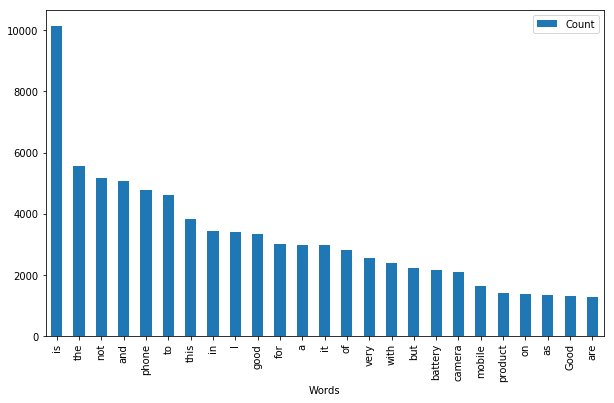

In [18]:
#bar graph for top 25 words used:
top_25_words.plot(kind='bar',x='Words',y='Count',figsize=(10,6))
plt.show()

#### Problems with the above visuals:
    1. case is non-uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
#not to be used
reviews_tokens=[word_tokenize(sent.lower()) for sent in reviews.review.values]
reviews_tokens

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

In [21]:
all_terms=word_tokenize(reviews_combined.lower())
all_terms

['good',
 'but',
 'need',
 'updates',
 'and',
 'improvements',
 'worst',
 'mobile',
 'i',
 'have',
 'bought',
 'ever',
 ',',
 'battery',
 'is',
 'draining',
 'like',
 'hell',
 ',',
 'backup',
 'is',
 'only',
 '6',
 'to',
 '7',
 'hours',
 'with',
 'internet',
 'uses',
 ',',
 'even',
 'if',
 'i',
 'put',
 'mobile',
 'idle',
 'its',
 'getting',
 'discharged.this',
 'is',
 'biggest',
 'lie',
 'from',
 'amazon',
 '&',
 'lenove',
 'which',
 'is',
 'not',
 'at',
 'all',
 'expected',
 ',',
 'they',
 'are',
 'making',
 'full',
 'by',
 'saying',
 'that',
 'battery',
 'is',
 '4000mah',
 '&',
 'booster',
 'charger',
 'is',
 'fake',
 ',',
 'it',
 'takes',
 'at',
 'least',
 '4',
 'to',
 '5',
 'hours',
 'to',
 'be',
 'fully',
 'charged.do',
 "n't",
 'know',
 'how',
 'lenovo',
 'will',
 'survive',
 'by',
 'making',
 'full',
 'of',
 'us.please',
 'don',
 ';',
 't',
 'go',
 'for',
 'this',
 'else',
 'you',
 'will',
 'regret',
 'like',
 'me',
 '.',
 'when',
 'i',
 'will',
 'get',
 'my',
 '10',
 '%',
 'ca

In [22]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [23]:
from nltk.probability import FreqDist
fdist=FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

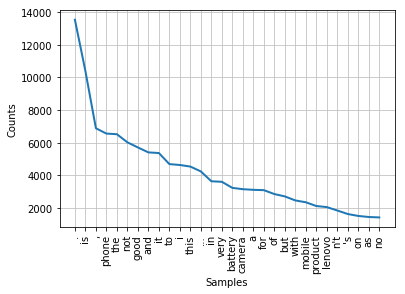

In [24]:
fdist.plot(30,cumulative=False)
plt.show()

#### The most commonly used and the least commonly used words in any language includes:
    1. language connectors called stop words
    2. punctuations

In [25]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk=stopwords.words("english")
print(stop_nltk)
print(list(punctuation))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
#adding new words and punctuations:
stop_updated=stop_nltk+["..","...","!!"]+["phone","lenovo","mobile","k8","note","amazon","n't"] #"😒😒☹️"
print(stop_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
reviews_updated1=[word for word in all_terms if word not in stop_updated and word not in list(punctuation)
                 and len(word)>2]
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

### Stemming:

In [28]:
from nltk.stem import PorterStemmer, SnowballStemmer
stemmer_p=PorterStemmer()
stemmer_s=SnowballStemmer('english')

In [29]:
#stem_tokens=word_tokenize(reviews_updated1)
stem_p_words=[stemmer_p.stem(word) for word in reviews_updated1]
stem_s_words=[stemmer_s.stem(word) for word in reviews_updated1]
print(len(set(stem_p_words)),len(set(stem_s_words)))

16245 16161


### Lemmatization:

In [30]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

In [31]:
lemm_words=[lemm.lemmatize(word) for word in reviews_updated1]
print(len(set(lemm_words)))

17901


In [32]:
print("The count of words using snowball stemming is: ",len(set(stem_s_words)))
print("The count of words using lemmatization is: ",len(set(lemm_words)))

The count of words using snowball stemming is:  16161
The count of words using lemmatization is:  17901


#### Conclusion:
    1.stemmer helps to reduce the number of distinct words in the corpus
    2.lemmetizer helps to retain the meaning of the words effectively used when the context of the word is important
    3.stemmer is used when we have an intent of getting lesser words which in turn reduces the total number of features

In [33]:
##Combine all the steps and create a udf
##takes one review as input and returns a cleaned review as a string

def clean_txt(sent):
    
    tokens=word_tokenize(sent.lower())
    stemmed=[stemmer_s.stem(word) for word in tokens if word not in stop_updated and word not in list(punctuation)
                 and len(word)>2]
    res=" ".join(stemmed)
    return res

In [34]:
reviews['clean_review']=reviews.review.apply(clean_txt)

In [35]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


#### WORD CLOUD:

In [36]:
reviews_combined_udf=" ".join(reviews.clean_review.values)

In [37]:
word_cloud2=WordCloud(max_words=150).generate_from_text(reviews_combined_udf)

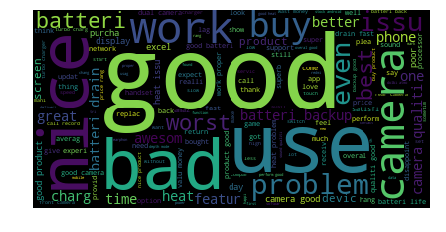

In [38]:
plt.imshow(word_cloud2)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [39]:
print(stop_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Remove the words no,nor,not from the list of words present in stopwords

In [40]:
##One way to remove the words:
stop_updated1=set(stop_updated)-{'no', 'nor', 'not'}
print(stop_updated1)

{'your', 'both', 'am', "you'll", 'mustn', 're', 'because', 'hers', 'i', 'who', "mustn't", 'wasn', 'so', 'but', 'those', 'of', 'yourselves', 'been', 'ma', 'phone', 'couldn', 'there', "haven't", 'being', 'from', 'where', 's', 'up', 'had', 'with', 'our', 'you', 'are', 'ain', 'any', "couldn't", 'hasn', 'about', 'is', 'above', "you'd", "you've", "should've", 'them', 'can', '!!', 'wouldn', 'what', 'such', 'doesn', '...', 'her', 'themselves', "you're", 'does', "she's", 'during', "won't", 'these', "shouldn't", 'same', 'each', 'y', 'to', 'myself', 'after', 'doing', 'did', "hadn't", 'below', "don't", 'was', 'shouldn', 'by', 'its', 'before', "needn't", 'under', 'this', 'him', 'o', 'most', 'off', "wouldn't", "mightn't", 'do', 'down', 'out', 'ourselves', 'me', 'won', "shan't", '..', 'll', 'aren', 'and', 'will', 'their', 'all', 'lenovo', 'didn', 'while', 'hadn', 'amazon', "n't", 'only', 'if', 'd', "that'll", 'an', 'into', 'then', 'has', 'through', 'herself', 'other', 'own', 'in', 'having', 'now', 'o

In [41]:
stop_updated1_list=list(stop_updated1)
print(stop_updated1_list)

['your', 'both', 'am', "you'll", 'mustn', 're', 'because', 'hers', 'i', 'who', "mustn't", 'wasn', 'so', 'but', 'those', 'of', 'yourselves', 'been', 'ma', 'phone', 'couldn', 'there', "haven't", 'being', 'from', 'where', 's', 'up', 'had', 'with', 'our', 'you', 'are', 'ain', 'any', "couldn't", 'hasn', 'about', 'is', 'above', "you'd", "you've", "should've", 'them', 'can', '!!', 'wouldn', 'what', 'such', 'doesn', '...', 'her', 'themselves', "you're", 'does', "she's", 'during', "won't", 'these', "shouldn't", 'same', 'each', 'y', 'to', 'myself', 'after', 'doing', 'did', "hadn't", 'below', "don't", 'was', 'shouldn', 'by', 'its', 'before', "needn't", 'under', 'this', 'him', 'o', 'most', 'off', "wouldn't", "mightn't", 'do', 'down', 'out', 'ourselves', 'me', 'won', "shan't", '..', 'll', 'aren', 'and', 'will', 'their', 'all', 'lenovo', 'didn', 'while', 'hadn', 'amazon', "n't", 'only', 'if', 'd', "that'll", 'an', 'into', 'then', 'has', 'through', 'herself', 'other', 'own', 'in', 'having', 'now', 'o

In [42]:
##Other way to remove the words:
##Example:
import numpy as np
a = ['a', 'l', 3.14, 42, 'u']
I = [0, 2]
np.delete(a, I).tolist()

['l', '42', 'u']

In [43]:
stop_updated_copy=stop_updated
words_to_be_removed=['not','no','nor']
after_words_removed=[]
for i in stop_updated_copy:
    if i not in words_to_be_removed:
        after_words_removed.append(i)
        
#after_words_removed=np.delete(stop_updated_copy,words_to_be_removed).tolist()
print(after_words_removed)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [44]:
#Bigram:

In [45]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer_bg=CountVectorizer(ngram_range=(2,2),max_features=25)

In [47]:
X_bg=count_vectorizer_bg.fit_transform(reviews['clean_review'])
X_bg

<14675x25 sparse matrix of type '<class 'numpy.int64'>'
	with 6709 stored elements in Compressed Sparse Row format>

In [48]:
bi_words=count_vectorizer_bg.get_feature_names()
print(bi_words)

['also good', 'batteri back', 'batteri backup', 'batteri drain', 'batteri life', 'call record', 'camera good', 'camera qualiti', 'drain fast', 'dual camera', 'front camera', 'get heat', 'good batteri', 'good camera', 'good product', 'heat issu', 'heat problem', 'price rang', 'qualiti good', 'rear camera', 'turbo charg', 'turbo charger', 'valu money', 'wast money', 'work proper']


In [49]:
DTM_bg=pd.DataFrame(X_bg.toarray(),columns=count_vectorizer_bg.get_feature_names())
DTM_bg.head()

,also good,batteri back,batteri backup,batteri drain,batteri life,call record,camera good,camera qualiti,drain fast,dual camera,...,heat issu,heat problem,price rang,qualiti good,rear camera,turbo charg,turbo charger,valu money,wast money,work proper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
descending_words=DTM_bg.sum().sort_values(ascending=False)
descending_words

batteri backup    593
batteri drain     490
camera qualiti    473
heat issu         397
good product      378
camera good       374
heat problem      340
dual camera       298
good batteri      287
drain fast        278
batteri life      272
good camera       248
work proper       234
get heat          224
qualiti good      217
valu money        210
wast money        190
front camera      189
call record       183
price rang        182
turbo charger     182
turbo charg       176
batteri back      176
rear camera       168
also good         164
dtype: int64

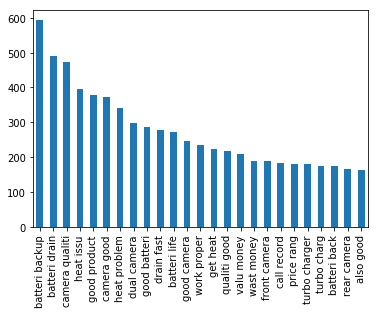

In [51]:
descending_words.plot(kind='bar')

In the amazon case study dataset, find the top 5 relevant reviews which has the below words:
    - "battery drain"
    - "Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on..

#### Sentiment Score:

#### Sentiment Prediction Strategy 1: Sentiment Score 

In [52]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


In [53]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t",header=None)
afinn.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [54]:
afinn.columns = ['Term','Score']

In [55]:
afinn.head()

,Term,Score
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [56]:
term_scores=dict(afinn.values)

In [57]:
print(term_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [58]:
#UDF:
def get_sentiment(text):
    score1=0
    tokens1=word_tokenize(text.lower())
    for term1 in tokens1:
        score1+=term_scores.get(term1,0)
    return score1

#get_sentiment(reviews['clean_review'])

In [59]:
reviews['sent_score']=reviews['clean_review'].apply(get_sentiment)

In [60]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7


In [61]:
reviews['sent_prediction']=reviews['sent_score'].apply(lambda x:1 if x>0 else 0)

In [62]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

###### Without using stemmer, create one more reviews segment to calculate the sentimental score and its improved accuracy:

In [65]:
def clean_txt1(text):
    
    tokens2=word_tokenize(text.lower())
    without_stemmed=[word for word in tokens2 if word not in stop_updated and word not in list(punctuation)
                 and len(word)>2]
    res=" ".join(without_stemmed)
    return res

In [66]:
reviews['clean_review_w/o_stem']=reviews.review.apply(clean_txt1)

In [67]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..
3,1,Good,good,3,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...


In [68]:
#UDF:
def get_sentiment1(text):
    score1=0
    tokens1=word_tokenize(text.lower())
    for term1 in tokens1:
        score1+=term_scores.get(term1,0)
    return score1

#get_sentiment(reviews['clean_review'])

In [69]:
reviews['sent_score_w/o_stem']=reviews['clean_review_w/o_stem'].apply(get_sentiment1)

In [70]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0
3,1,Good,good,3,1,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7


In [71]:
reviews['sent_prediction_w/o_stem']=reviews['sent_score_w/o_stem'].apply(lambda x:1 if x>0 else 0)

In [72]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0
3,1,Good,good,3,1,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0


In [73]:
accuracy_score(reviews.sentiment,reviews['sent_prediction_w/o_stem'])

0.7467802385008517

#### Vader:

#### Sentiment Prediction Strategy 2: Vader

###### Get the vader sentiment scores and predicted sentiments for the reviews. Use the original reviews to get the scores

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()

In [75]:
##UDF
def get_vader_sentiment(text):
    return analyser.polarity_scores(text)['compound']

In [76]:
reviews['vader_sent']=reviews['review'].apply(get_vader_sentiment)
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000
3,1,Good,good,3,1,good,3,1,0.4404
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289


In [77]:
reviews['vader_prediction']=reviews['vader_sent'].apply(lambda x:1 if x>0.3 else 0)
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0
3,1,Good,good,3,1,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0


In [78]:
accuracy_score(reviews.sentiment,reviews['vader_prediction'])

0.7990459965928449

#### Sentiment Prediction Strategy 3: Building our own model

In [79]:
X=reviews.clean_review
y=reviews.sentiment

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()

In [82]:
X_train_bow=count_vect.fit_transform(X_train)

In [83]:
X_test_bow=count_vect.transform(X_test)

In [84]:
print(X_train_bow.shape,X_test_bow.shape)

(11740, 9217) (2935, 9217)


##### Model building using logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [86]:
log_reg=LogisticRegression()

In [87]:
log_reg.fit(X_train_bow,y_train)

C:\Users\Srishti\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_test_pred=log_reg.predict(X_test_bow)

In [89]:
accuracy_score(y_test,y_test_pred) #in case of tfidf vectorizer will give 0.8616

0.8572402044293015

#### KMeans Clustering

In [90]:
#Lets assume a sample DTM with 10 documents
#containing 2 terms after cleaning
t1=[]
t2=[]
for i in bi_words:
    t1.append(i.split()[0])
    t2.append(i.split()[1])

DTM=pd.DataFrame()
DTM['t1']=t1
DTM['t2']=t2
DTM

,t1,t2
0,also,good
1,batteri,back
2,batteri,backup
3,batteri,drain
4,batteri,life
5,call,record
6,camera,good
7,camera,qualiti
8,drain,fast
9,dual,camera


In [91]:
X1=np.array(DTM[['t1','t2']])
X1

array([['also', 'good'],
       ['batteri', 'back'],
       ['batteri', 'backup'],
       ['batteri', 'drain'],
       ['batteri', 'life'],
       ['call', 'record'],
       ['camera', 'good'],
       ['camera', 'qualiti'],
       ['drain', 'fast'],
       ['dual', 'camera'],
       ['front', 'camera'],
       ['get', 'heat'],
       ['good', 'batteri'],
       ['good', 'camera'],
       ['good', 'product'],
       ['heat', 'issu'],
       ['heat', 'problem'],
       ['price', 'rang'],
       ['qualiti', 'good'],
       ['rear', 'camera'],
       ['turbo', 'charg'],
       ['turbo', 'charger'],
       ['valu', 'money'],
       ['wast', 'money'],
       ['work', 'proper']], dtype=object)

In [92]:
DTM_bg.head()

,also good,batteri back,batteri backup,batteri drain,batteri life,call record,camera good,camera qualiti,drain fast,dual camera,...,heat issu,heat problem,price rang,qualiti good,rear camera,turbo charg,turbo charger,valu money,wast money,work proper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
bi_words
num_clusters=5

In [94]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=num_clusters)
kmeans.fit_predict(X_bg)

array([0, 0, 0, ..., 0, 0, 0])

In [95]:

print('Top term per clusters')
#Get the index of the cluster centers in reverse order for every cluster
#Step 1:
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
#Step 2:
for i in range(num_clusters):
    print('Cluster : ',i)
    for ind in order_centroids_arg[i,:1]:
        #To print the dominating term per cluster
        print(bi_words[ind])

Top term per clusters
Cluster :  0
batteri drain
Cluster :  1
batteri backup
Cluster :  2
front camera
Cluster :  3
heat issu
Cluster :  4
camera qualiti


In [96]:
#word_cloud_c1=WordCloud().generate()

In [97]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0
3,1,Good,good,3,1,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0


In [98]:
ls=[]
for i in reviews.vader_sent:
    if i>=-1 and i<-0.5:
        ls.append('Very bad')
    elif i>=-0.5 and i<-0.2:
        ls.append('Bad')
    elif i>=-0.2 and i<0.2:
        ls.append('Neutral')
    elif i>=0.2 and i<0.5:
        ls.append('Good')
    else:
        ls.append('Very good')
reviews['vader_class']=ls
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction,vader_class
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1,Very good
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0,Very bad
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0,Neutral
3,1,Good,good,3,1,good,3,1,0.4404,1,Good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0,Very bad


In [99]:
reviews.vader_class.unique()

array(['Very good', 'Very bad', 'Neutral', 'Good', 'Bad'], dtype=object)

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()
reviews['vader_class_le']=le.fit_transform(reviews.vader_class)
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction,vader_class,vader_class_le
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1,Very good,4
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0,Very bad,3
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0,Neutral,2
3,1,Good,good,3,1,good,3,1,0.4404,1,Good,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0,Very bad,3


In [102]:
x=reviews.clean_review
y=reviews.vader_class_le

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
#tfidf_vectorizer=TfidfVectorizer()
count_vectorizer=CountVectorizer()
x_train_tfidf=count_vectorizer.fit_transform(x_train)
x_test_tfidf=count_vectorizer.transform(x_test)

In [106]:
print(x_train_tfidf.shape,x_test_tfidf.shape)

(11740, 9303) (2935, 9303)


In [107]:
classifier=MultinomialNB()
classifier.fit(x_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
y_pred = classifier.predict(x_test_tfidf)
y_pred

array([3, 1, 1, ..., 4, 3, 4])

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.5689948892674617

In [110]:
confusion_matrix(y_test,y_pred)

array([[ 23,  29,  54, 159, 106],
       [  1, 348,  37,  54, 256],
       [ 14,  36, 217, 112, 193],
       [ 14,   3,  23, 363,  62],
       [  1,  50,  17,  44, 719]], dtype=int64)

#### Cosine Similarity:

In [111]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction,vader_class,vader_class_le
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,3,1,0.5994,1,Very good,4
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,-8,0,-0.8720,0,Very bad,3
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,get cash back already january..,0,0,0.0000,0,Neutral,2
3,1,Good,good,3,1,good,3,1,0.4404,1,Good,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,-7,0,worst everthey changed last problem still retu...,-7,0,-0.8289,0,Very bad,3


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X=count_vect.fit_transform(reviews['clean_review_w/o_stem'])

In [113]:
df=pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names())
df.head()

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df.shape

(14675, 12275)

In [115]:
from sklearn.metrics.pairwise import cosine_similarity

In [116]:
(cosine_similarity(df[1:2],df.drop(df.index[1])).flatten().argsort()[::-1]+1)[:5]

array([4846, 4821, 8449, 3330, 2152], dtype=int64)

In [117]:
reviews['clean_review_w/o_stem'][1]

'worst bought ever battery draining like hell backup hours internet uses even put idle getting discharged.this biggest lie lenove expected making full saying battery 4000mah booster charger fake takes least hours fully charged.do know survive making full us.please else regret like'

In [118]:
reviews['clean_review_w/o_stem'][4846]

'worst ever battery giving backup maximum hours internet.do buy'

In [119]:
reviews['clean_review_w/o_stem'][4821]

'battery discharges fast even stand mode takes hours full charge fully disappointed battery'

In [120]:
reviews['clean_review_w/o_stem'][8449]

'worst product till date hand set issues date purchase issues faced eye opener prospective buyers:1. hang-up usage often left stranded apps hangs-up usage like checking whatsapp email sms2 heats excessively claim fast charging false takes almost hours full charge heats even making calls drains battery quite fast battery last even hours post full charge3 battery claim turbo charge false fast charging takes 5-6 hours full charge heats even making calls drains battery quite fast battery last even hours post full charge4 access common functions even access common functions like providing sms service centre number recently taken handset service centre even know put sms service centre number.5 forum unlike leading even lesser known brands executives respond queries/issues put forum.over bad product choose issue dispose same.regardscertified buyer'

In [121]:
reviews['clean_review_w/o_stem'][3330]

'worst ever oero update getting battery backup around hours yes hours camera worst'

In [122]:
reviews['clean_review_w/o_stem'][2152]

'really good battery takes hours full charge'

In [123]:
reviews['vader_sent'].min()

-0.9971

In [124]:
reviews[reviews['vader_sent']==-0.9971]

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_w/o_stem,sent_score_w/o_stem,sent_prediction_w/o_stem,vader_sent,vader_prediction,vader_class,vader_class_le
8075,0,Waste waste waste waste waste waste waste wast...,wast wast wast wast wast wast wast wast wast w...,0,0,waste waste waste waste waste waste waste wast...,-28,0,-0.9971,0,Very bad,3


In [125]:
cs = cosine_similarity(df) #best way to find the cosine_similarity

In [126]:
cs[1].argsort()[::-1][1:6] #4846, 4821, 8449, 3330, 2152

array([4846, 4821, 8449, 3330, 2152], dtype=int64)

In [127]:
cs[8075].argsort()[::-1][1:5]

array([9381, 3054, 4381, 6201], dtype=int64)

In [128]:
cs[8075].argsort()[::-1][:6]

array([8075, 9381, 3054, 4381, 6201, 7770], dtype=int64)

In [129]:
cs[8075].argsort()[::-1][1:6] #correct logic for randomly picking any index from inbetween the data

array([9381, 3054, 4381, 6201, 7770], dtype=int64)

In [130]:
(cosine_similarity(df[8075:8076],df.drop(df.index[8075])).flatten().argsort()[::-1]+1)[:5] #wrong output is coming

array([3055, 4382, 6202, 7771, 9381], dtype=int64)

In [131]:
reviews['clean_review_w/o_stem'][8075]

'waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste waste'

In [132]:
reviews['clean_review_w/o_stem'][7770]

'waste'

In [133]:
reviews['clean_review_w/o_stem'][4381]

'waste'

In [134]:
reviews['clean_review_w/o_stem'][6201]

'waste'

In [135]:
reviews['clean_review_w/o_stem'][7770]

'waste'

In [136]:
reviews['clean_review_w/o_stem'][9381]

'waste'

In [137]:
reviews['clean_review_w/o_stem'][7771] #invalid

'good rate'

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(reviews.clean_review)

In [139]:
df_tfidf=pd.DataFrame(X.toarray(),columns=tfidf.get_feature_names())
df_tfidf.head()

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
def get_similar_words(text,sim_mat):
    cos_vals=sim_mat[text].sort_values(ascending=False)
    similar_words=cos_vals.drop(text).head(5)
    return similar_words

In [141]:
sim_mat=cosine_similarity(df_tfidf.T)
sim_mat=pd.DataFrame(sim_mat,columns=df_tfidf.columns,index=df_tfidf.columns)
get_similar_words('drain',sim_mat)

fast       0.456091
batteri    0.372997
quick      0.168597
idl        0.156296
faster     0.138621
Name: drain, dtype: float64

In [142]:
#Understanding how the function works
sim_mat['charge'].sort_values(ascending=False).drop('charge').head(5)

headache     0.280328
1and         0.226942
drine        0.200816
goodcharg    0.193385
backup7      0.193385
Name: charge, dtype: float64